In [1]:
## 1.
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
# Start a Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("BostonHousing").getOrCreate()

In [3]:
# TASK 2. Read CVS file in PySpark

# Upload CSV file to Colab
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [4]:
# Read the dataset/file in PySpark
df = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [6]:
# 3: Single vector column using VectorAssembler
from pyspark.ml import pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, VectorAssembler

# Combine features to a single vector column using VectorAssembler
assembler = VectorAssembler(inputCols=df.columns[:-1], outputCol="features")
df_assembled = assembler.transform(df)
df_assembled.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
only showing top 5 rows



In [7]:
# 4: Standardize features for principal component
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",  withStd=True, withMean=True)
df_scaled = scaler.fit(df_assembled).transform(df_assembled)
df_scaled.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|      scaledFeatures|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[-0.4193669292132...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[-0.4169266699640...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[-0.4169289951277...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[-0.4163384035610...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|[-0.4120740534

In [8]:
# 5: Train model for two principal component analysis
from pyspark.ml.feature import PCA

# Use the correct column name 'scaledFeatures'
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pca_features")
pca_model = pca.fit(df_scaled)
df_pca = pca_model.transform(df_scaled)
df_pca.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|      scaledFeatures|        pca_features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[-0.4163384035

In [9]:
#  6: Collect distributed data in numpy array and convert to pandas dataframe
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

# Collect distributed data in numpy array and then convert to pandas dataframe
pca_data = df_pca.select("pca_features").collect()
pca_data = [row["pca_features"] for row in pca_data]
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


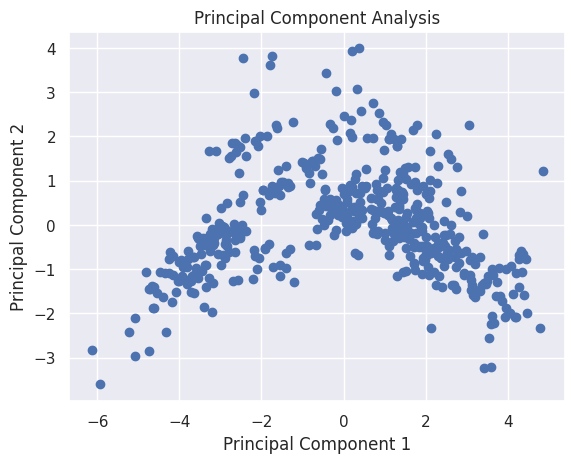

In [10]:
# 7: # Plot two principal components
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component Analysis")
plt.show()

In [11]:
#  8: # Vectorize features and target together for model development
assembler = VectorAssembler(inputCols=df.columns[:-1], outputCol="features")
df_assembled = assembler.transform(df)
df_assembled.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
only showing top 5 rows



In [12]:
#9:Split dataset into training and testing dataset
train_df, test_df = df_assembled.randomSplit([0.8, 0.2], seed=42)

In [13]:
#10: Fit model for linear regression
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="medv")
lr_model = lr.fit(train_df)

In [14]:
#11: Find out model coefficients and intercept
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.1136220372940893,0.04890918693405423,0.02379542898673218,2.8017719987351315,-18.41542454118947,3.5158797633119243,0.005211682161471423,-1.416383072353979,0.33176693159370374,-0.013607893704163855,-0.9534143338408103,0.008602677392853194,-0.5195035312476691]
Intercept: 38.61699144573505


In [17]:
# 12: Evaluate model for test dataset
from pyspark.ml.evaluation import RegressionEvaluator
pred = lr_model.evaluate(test_df)
pred.predictions.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|        prediction|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+------------------+
|0.01096|55.0| 2.25|   0|0.389|6.453|31.9|7.3073|  1|300|   15.3|394.72| 8.23|22.0|[0.01096,55.0,2.2...|27.482274018186136|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|[0.01381,80.0,0.4...| 40.59821928572488|
|0.01439|60.0| 2.93|   0|0.401|6.604|18.8|6.2196|  1|265|   15.6| 376.7| 4.38|29.1|[0.01439,60.0,2.9...|31.560171030407247|
|0.01778|95.0| 1.47|   0|0.403|7.135|13.9|7.6534|  3|402|   17.0| 384.3| 4.45|32.9|[0.01778,95.0,1.4...|30.504107540914163|
|0.02177|82.5| 2.03|   0|0.415| 7.61|15.7|  6.27|  2|348|   14.7|395.38| 3.11|42.3|[0.02177,82.5,2.0...| 36.71084264945599|
+-------

Coefficients: [-0.1136220372940893,0.04890918693405423,0.02379542898673218,2.8017719987351315,-18.41542454118947,3.5158797633119243,0.005211682161471423,-1.416383072353979,0.33176693159370374,-0.013607893704163855,-0.9534143338408103,0.008602677392853194,-0.5195035312476691]
Intercept: 38.61699144573505
Feature Importance:
nox: 18.415
rm: 3.516
chas: 2.802
dis: 1.416
ptratio: 0.953
lstat: 0.520
rad: 0.332
crim: 0.114
zn: 0.049
indus: 0.024
tax: 0.014
b: 0.009
age: 0.005


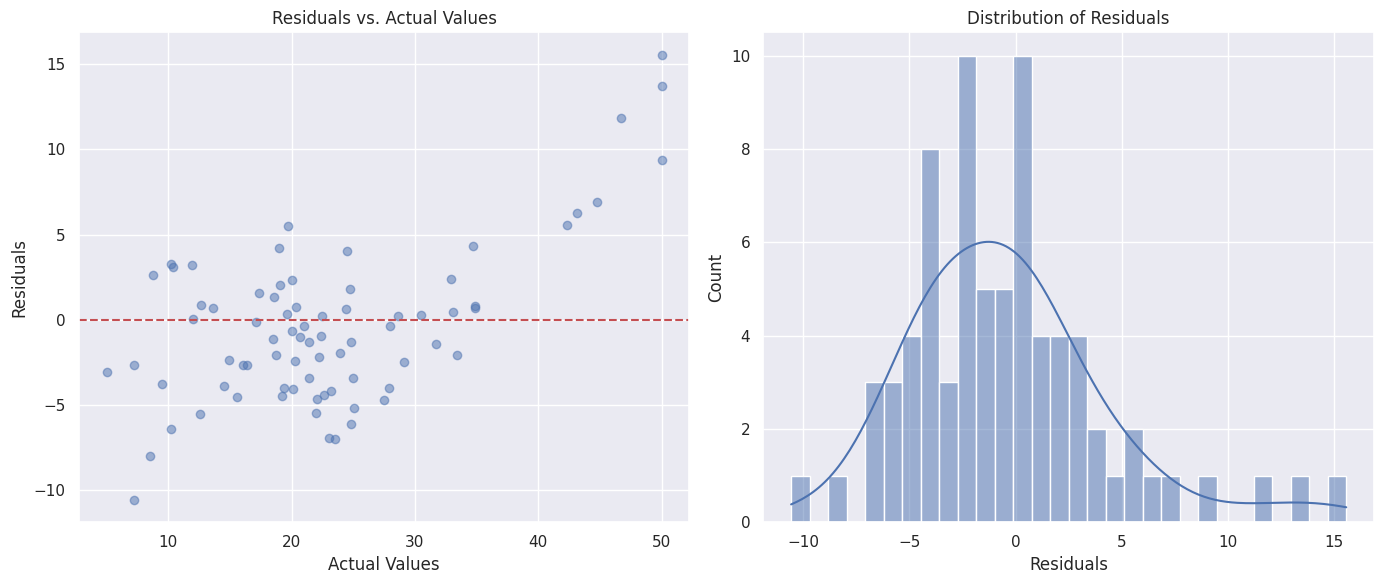

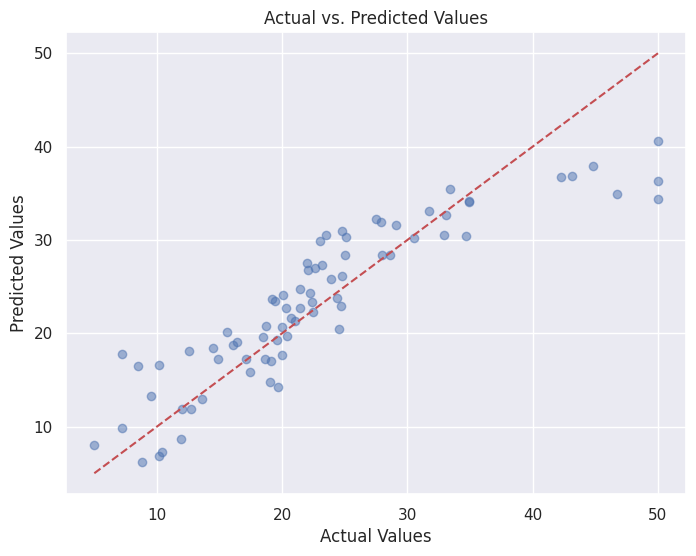

R-Squared Value: 0.7931522547835961


In [24]:
# 13 Perform further analysis for better interpretation of model results
# Get the coefficients of the model
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate feature importance
importance = [abs(coeff) for coeff in coefficients]
feature_importance = list(zip(df.columns[:-1], importance))
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.3f}")

# Calculate residuals
test_pred = lr_model.transform(test_df)
residuals = test_pred.select("medv", "prediction").rdd.map(lambda x: (x.medv, x.prediction)).collect()

actual_values = [x[0] for x in residuals]
predicted_values = [x[1] for x in residuals]
residual_values = [x[0] - x[1] for x in residuals]

# Plot residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Subplot 1: Residuals scatter plot
plt.subplot(1, 2, 1)
plt.scatter(actual_values, residual_values, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual Values")

# Subplot 2: Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residual_values, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")

plt.tight_layout()
plt.show()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Calculate R-squared value
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(test_pred)

print("R-Squared Value:", r2)
